In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df0535 = pd.read_csv('./EA1_05_explorive_35_exploit/EA1_05_explorive_35_exploit.txt', delimiter=',')
df1030 = pd.read_csv('./EA1_10_explorive_30_exploit/EA1_10_explorive_30_exploit.txt', delimiter=',')
df2020 = pd.read_csv('./EA1_20_explorive_20_exploit/EA1_20_explorive_20_exploit.txt', delimiter=',')

display(df0535)

,run,enemy,generation,max.fitness,mean.fitness,median.fitness,min.fitness,std.fitness,tournament.size,mutation.p.individual,mutation.p.genome,mutation.sigma,population.size,elites,phase
0,28/09/2024 21:06:30,4,0,37.773,0.051,-5.371,-7.290,10.354,8,0.5,0.5,0.35,88,0,initialize
1,28/09/2024 21:06:30,4,1,39.310,17.322,21.405,-4.990,9.910,8,0.5,0.5,0.35,88,0,exploring
2,28/09/2024 21:06:30,4,2,85.765,25.269,21.593,3.108,15.853,8,0.5,0.5,0.35,88,0,exploring
3,28/09/2024 21:06:30,4,3,89.159,36.742,30.327,2.854,21.630,8,0.5,0.5,0.35,88,0,exploring
4,28/09/2024 21:06:30,4,4,92.691,50.450,39.021,2.804,28.772,8,0.5,0.5,0.35,88,0,exploring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,28/09/2024 21:27:23,4,36,91.689,88.760,91.297,20.725,10.593,2,0.5,0.2,0.05,88,50,exploiting
406,28/09/2024 21:27:23,4,37,91.689,87.661,91.508,20.707,13.053,2,0.5,0.2,0.05,88,50,exploiting
407,28/09/2024 21:27:23,4,38,91.749,90.277,91.628,65.088,4.900,2,0.5,0.2,0.05,88,50,exploiting
408,28/09/2024 21:27:23,4,39,91.809,88.433,91.628,38.608,9.351,2,0.5,0.2,0.05,88,50,exploiting


In [9]:
# Concatenate data

df0535['experiment.split'] = "05 explore / 35 exploit"
df1030['experiment.split'] = "10 explore / 30 exploit"
df2020['experiment.split'] = "20 explore / 20 exploit"


df = pd.concat([df0535, df1030, df2020])

df.head()

,run,enemy,generation,max.fitness,mean.fitness,median.fitness,min.fitness,std.fitness,tournament.size,mutation.p.individual,mutation.p.genome,mutation.sigma,population.size,elites,phase,experiment.split
0,28/09/2024 21:06:30,4,0,37.773,0.051,-5.371,-7.290,10.354,8,0.5,0.5,0.35,88,0,initialize,05 explore / 35 exploit
1,28/09/2024 21:06:30,4,1,39.310,17.322,21.405,-4.990,9.910,8,0.5,0.5,0.35,88,0,exploring,05 explore / 35 exploit
2,28/09/2024 21:06:30,4,2,85.765,25.269,21.593,3.108,15.853,8,0.5,0.5,0.35,88,0,exploring,05 explore / 35 exploit
3,28/09/2024 21:06:30,4,3,89.159,36.742,30.327,2.854,21.630,8,0.5,0.5,0.35,88,0,exploring,05 explore / 35 exploit
4,28/09/2024 21:06:30,4,4,92.691,50.450,39.021,2.804,28.772,8,0.5,0.5,0.35,88,0,exploring,05 explore / 35 exploit


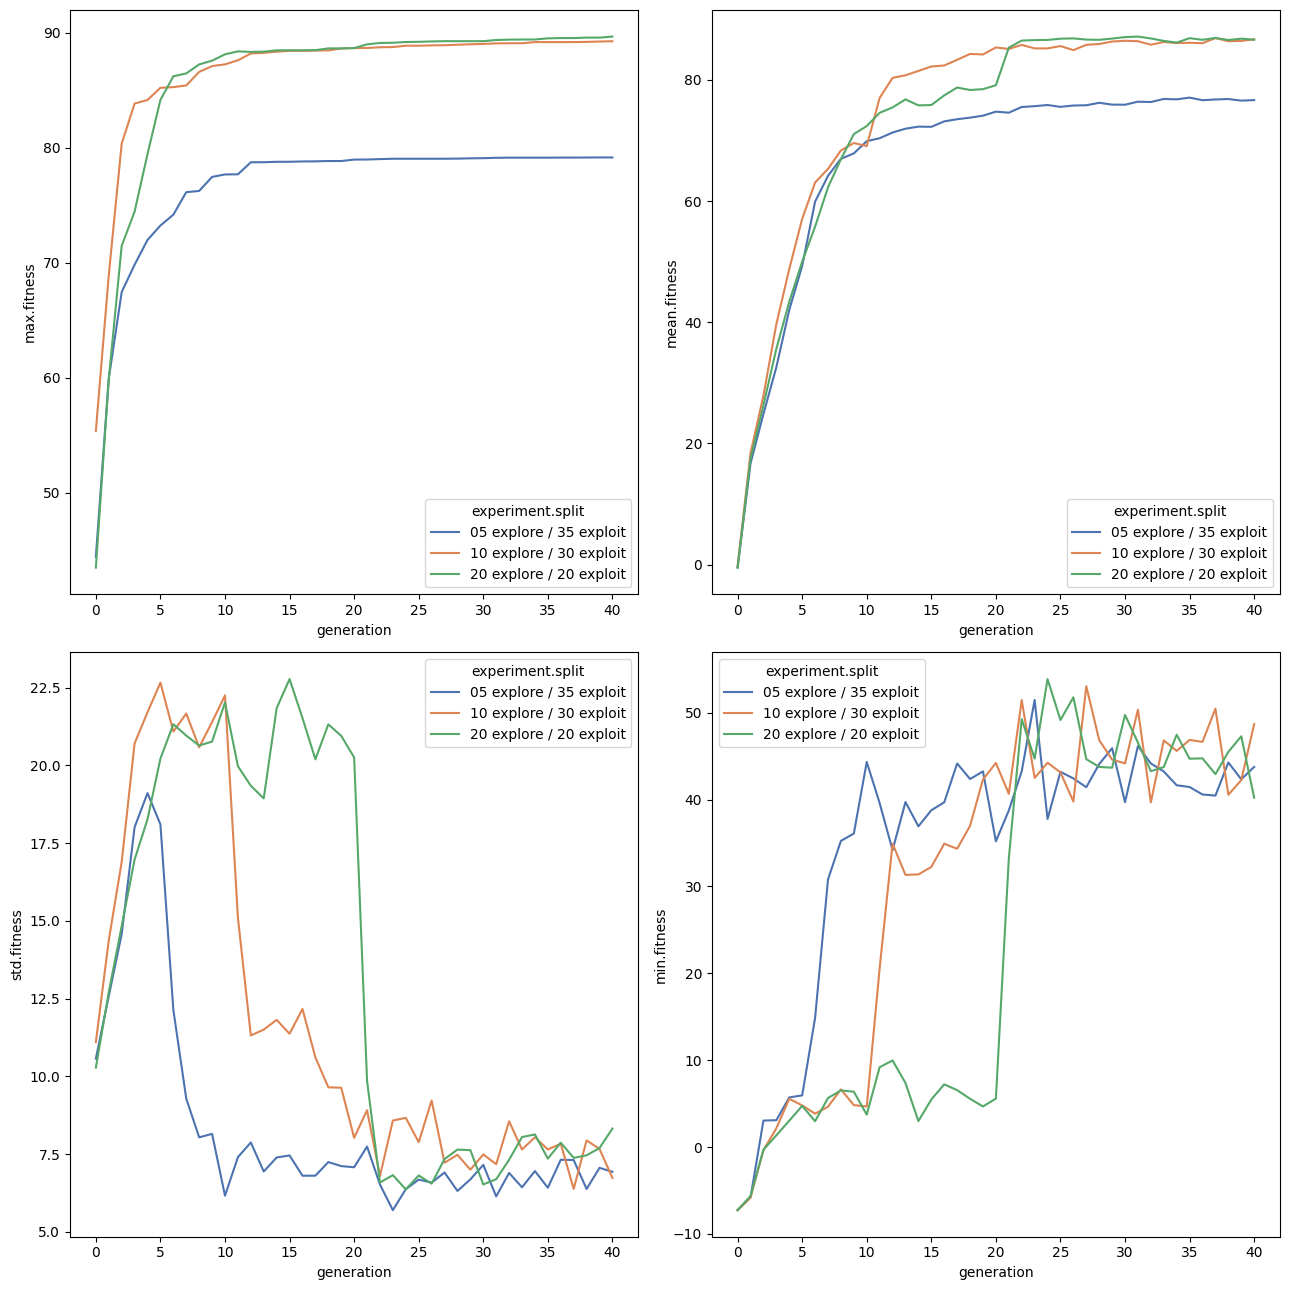

In [57]:
df_mean_data = df.groupby(['experiment.split', 'generation'])[['max.fitness' ,'mean.fitness' ,'median.fitness' ,'min.fitness' ,'std.fitness']].mean().reset_index()

fig, axs = plt.subplots(2,  2, figsize=(13, 13))

with sns.color_palette("deep"):
    sns.lineplot(ax = axs[0, 0], data=df_mean_data, x = 'generation', y = 'max.fitness', hue = 'experiment.split')
    sns.lineplot(ax = axs[0, 1], data=df_mean_data, x = 'generation', y = 'mean.fitness', hue = 'experiment.split')
    sns.lineplot(ax = axs[1, 0], data=df_mean_data, x = 'generation', y = 'std.fitness', hue = 'experiment.split')
    sns.lineplot(ax = axs[1, 1], data=df_mean_data, x = 'generation', y = 'min.fitness', hue = 'experiment.split')


plt.tight_layout()
plt.show()

## Visualization of runs per enemey

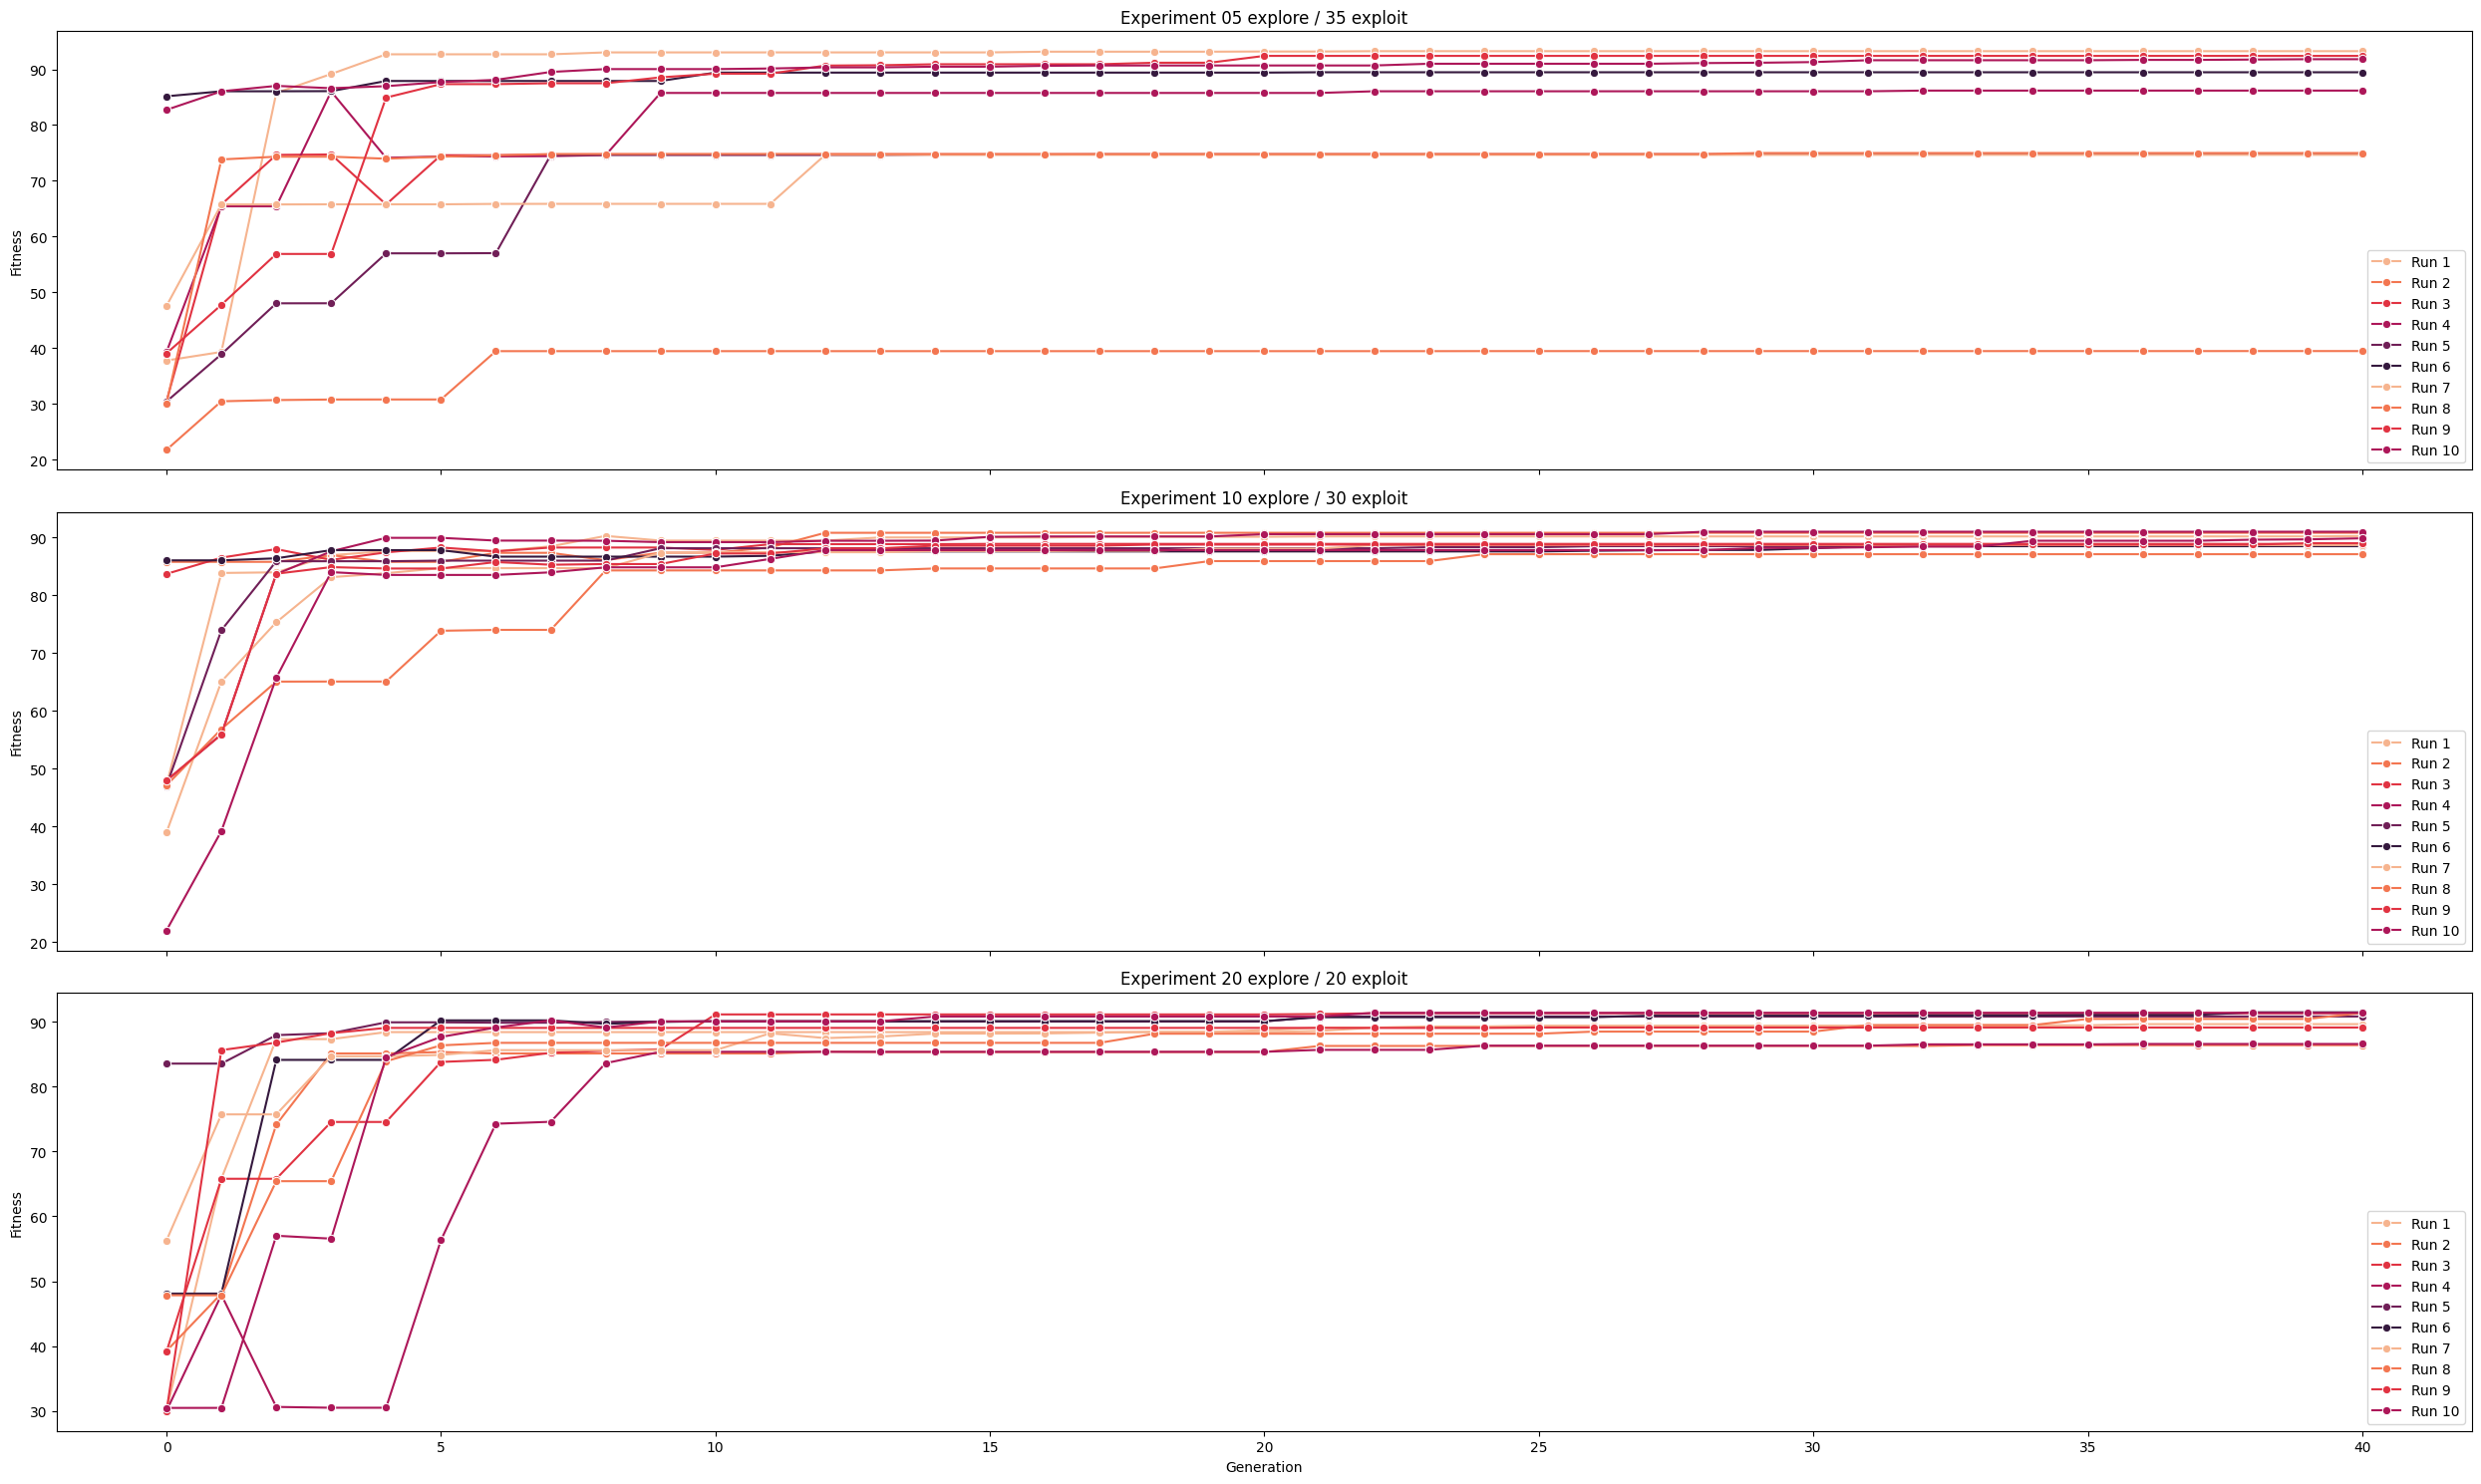

In [60]:
# Set the number of enemies and runs
experiments = df['experiment.split'].unique()

# Create subplots for each enemy
fig, axs = plt.subplots(len(experiments), 1, figsize=(25, 15), sharex= True)

# Iterate through each enemy and plot their runs
for i, exp in enumerate(experiments):
    
    ax = axs[i]
    exp_data = df[df['experiment.split'] == exp]
    run_data = exp_data['run'].unique()

    # Plot each run for this enemy
    for run_id, run in enumerate(run_data):
        data = exp_data[exp_data['run'] == run]
        with sns.color_palette('rocket'):
            sns.lineplot(ax=ax, x = data['generation'], y = data['max.fitness'], marker='o', label=f'Run {run_id + 1}')
    
    # Customize the plot for this enemy
    ax.set_title(f'Experiment {exp}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.legend(loc=4)

# Display the plot
plt.tight_layout()
plt.show()

## The mean fitness value of the population per generation

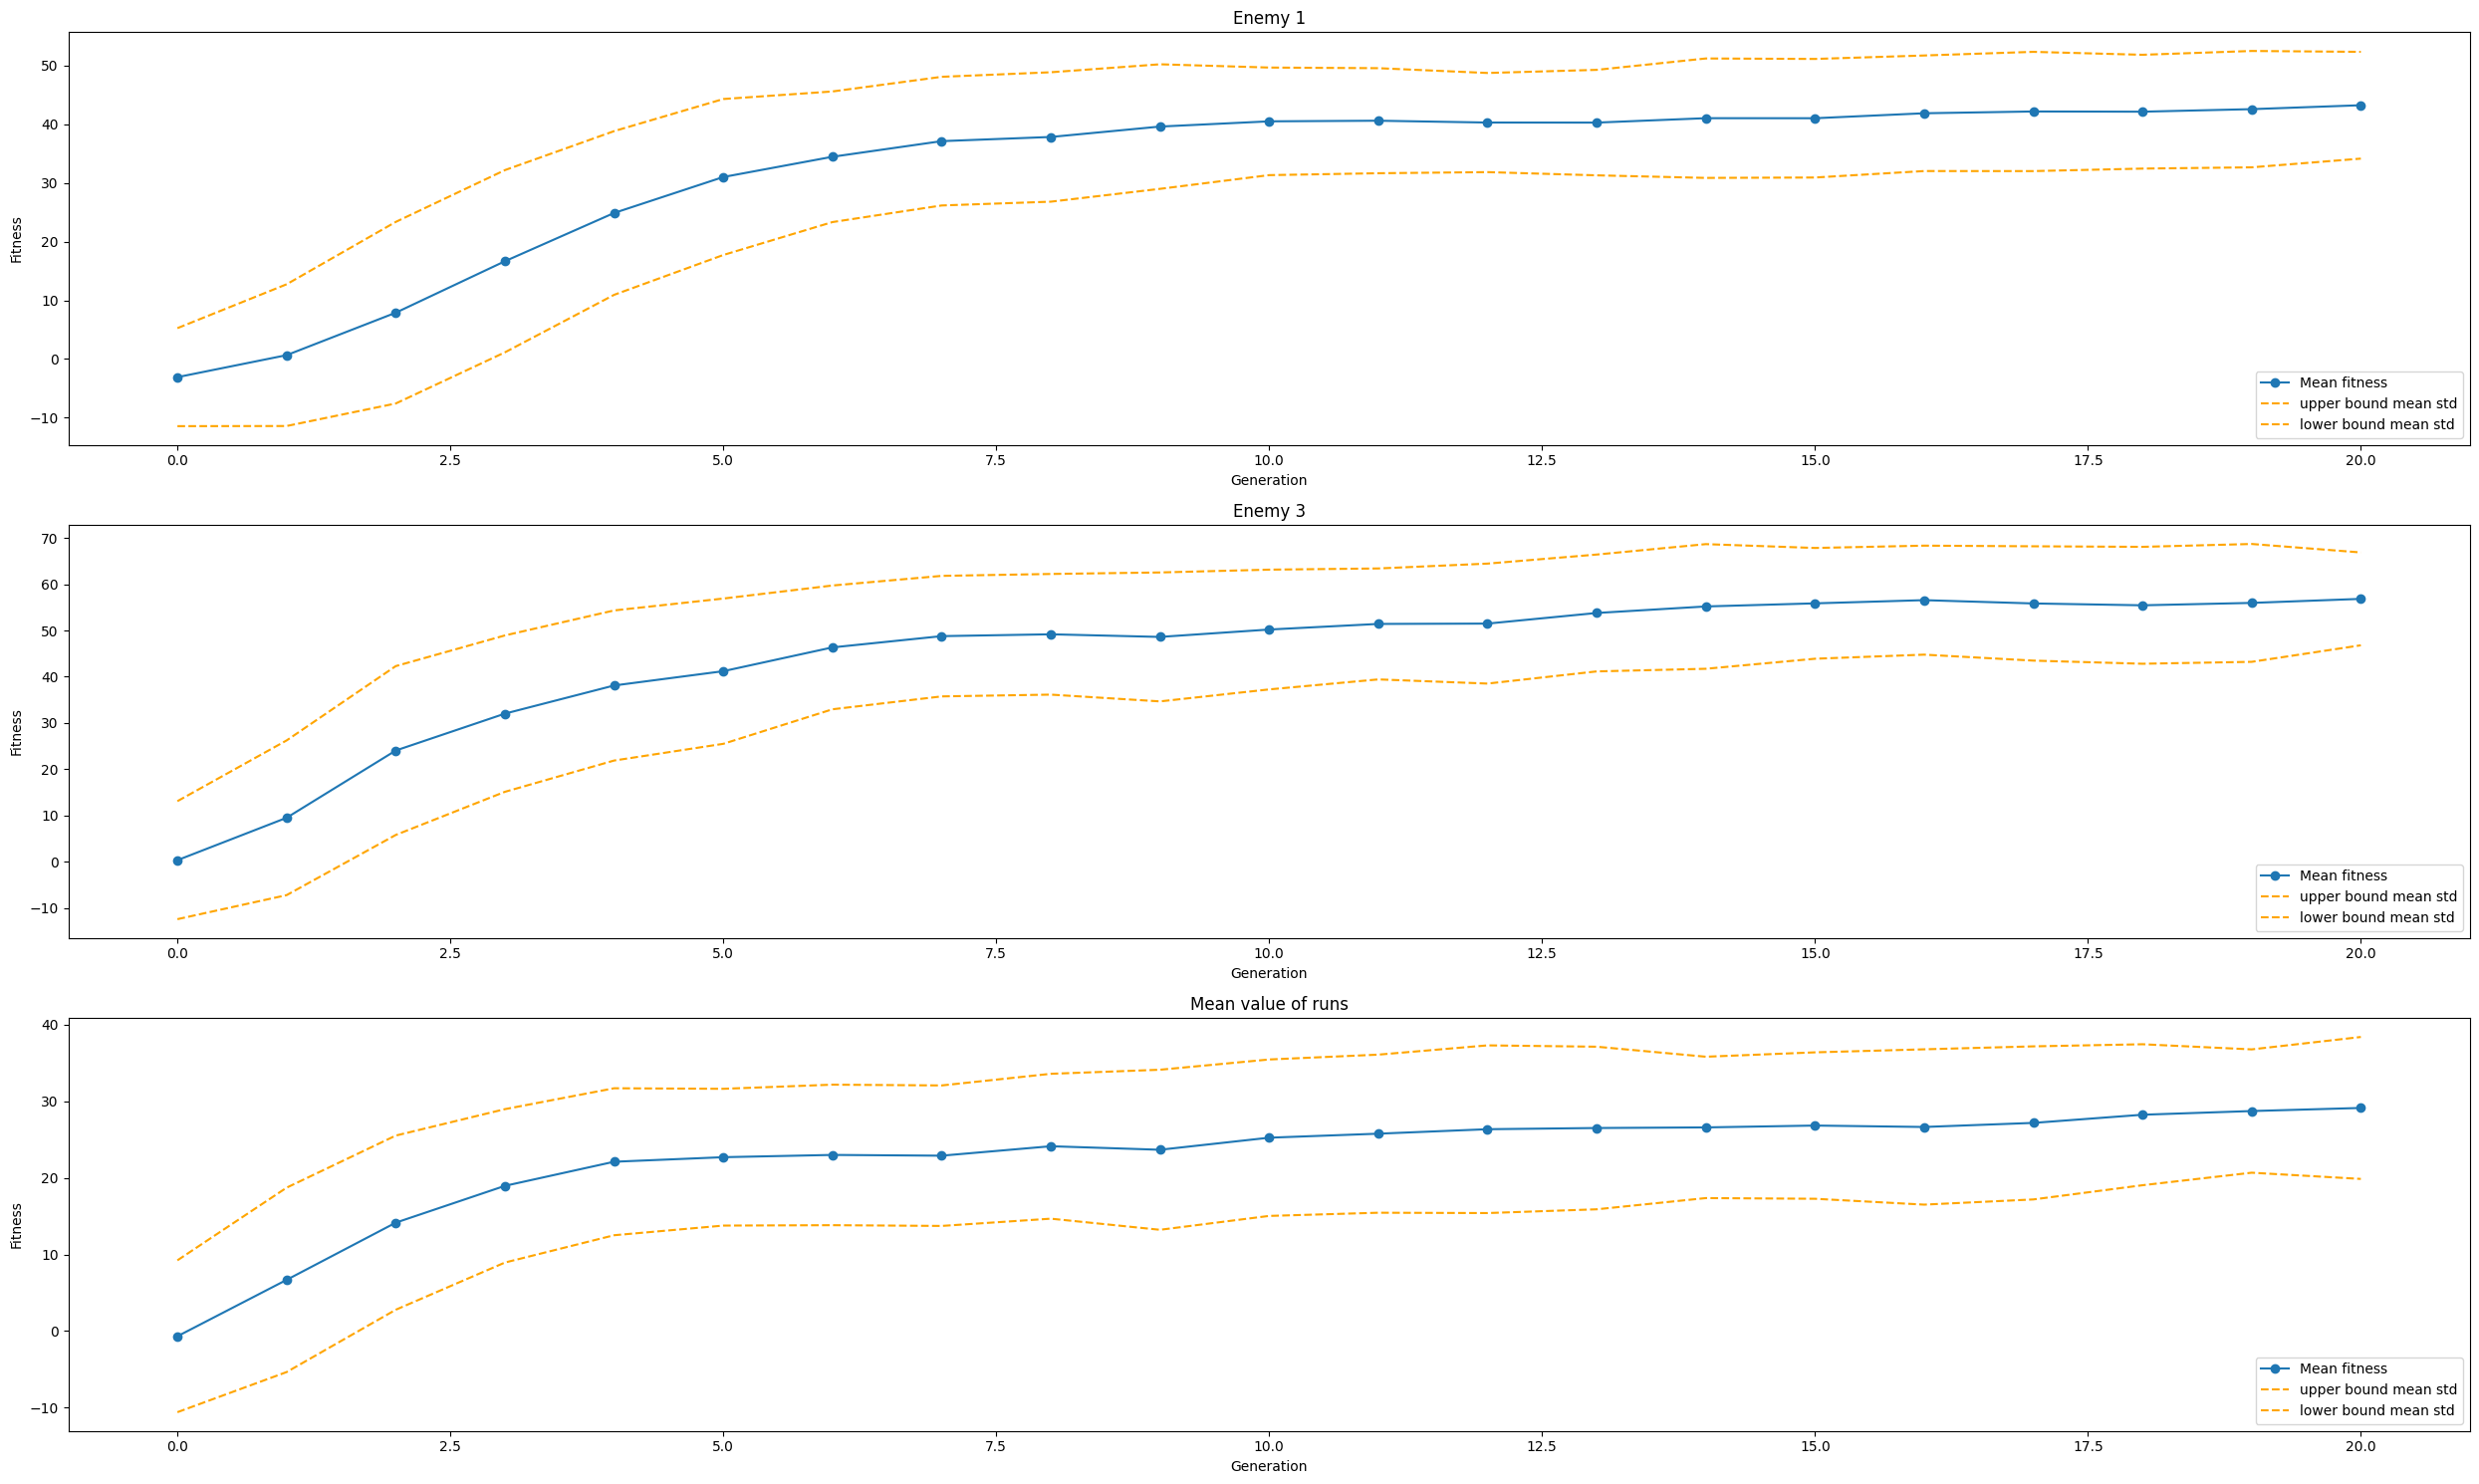

In [40]:
# get mean values of runs
data = df.groupby(['enemy', 'generation'])[['fitness', 'mean.fitness', 'std.fitness']].mean().reset_index(drop=False)

# Set the number of enemies and runs
enemies = data['enemy'].unique()

# Create subplots for each enemy
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

# If there's only one enemy, axs is not a list, so wrap it in a list
if len(enemies) == 1:
    axs = [axs]

# Iterate through each enemy and plot their runs
for i, enemy in enumerate(enemies):
    
    ax = axs[i]
    enemy_data = data[data['enemy'] == enemy]

    ax.plot(enemy_data['generation'], enemy_data['mean.fitness'], marker='o', label='Mean fitness')

    ub = enemy_data['mean.fitness'] + enemy_data['std.fitness']
    lb = enemy_data['mean.fitness'] - enemy_data['std.fitness']

    ax.plot(enemy_data['generation'],ub , color = 'orange', linestyle='dashed', label='upper bound mean std')
    ax.plot(enemy_data['generation'],lb , color = 'orange', linestyle='dashed', label='lower bound mean std')
    
    # Customize the plot for this enemy
    ax.set_title(f'Enemy {enemy}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.legend(loc=4)

# Display the plot
plt.tight_layout()
plt.show()